__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?

__Задача 3__

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

In [25]:
df = {
    'x1': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'y1': [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    'x2': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'y2': [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    'x3': [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    'y3': [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    'x4': [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    'y4': [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}

In [26]:
x1=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1=np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2=np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3=np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3=np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4=np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4=np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

In [27]:
x1.mean(), y1.mean(), x2.mean(), y2.mean(), x3.mean(), y3.mean(), x4.mean(), y4.mean()

(9.0,
 7.500909090909093,
 9.0,
 7.50090909090909,
 9.0,
 7.5,
 9.0,
 7.500909090909091)

In [28]:
x1.var(ddof=1), y1.var(ddof=1), x2.var(ddof=1), y2.var(ddof=1), x3.var(ddof=1), y3.var(ddof=1), x4.var(ddof=1), y4.var(ddof=1)  

(11.0,
 4.127269090909091,
 11.0,
 4.127629090909091,
 11.0,
 4.12262,
 11.0,
 4.123249090909091)

Комментарий к подзадаче 1: как мы видим, выборки разные, данные разные, но средние значения выборок и их дисперсии совпадают (!!!)

In [29]:
np.corrcoef(x1, y1), np.corrcoef(x2, y2), np.corrcoef(x3, y3), np.corrcoef(x4, y4)

(array([[1.        , 0.81642052],
        [0.81642052, 1.        ]]), array([[1.        , 0.81623651],
        [0.81623651, 1.        ]]), array([[1.        , 0.81628674],
        [0.81628674, 1.        ]]), array([[1.        , 0.81652144],
        [0.81652144, 1.        ]]))

Корреляции идентичны - мы это наглядно видим из нашей матрицы корелляции. 

In [31]:
b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b0 = y1.mean() - b1 * x1.mean()

b0, b1

(3.0000909090909094, 0.5000909090909093)

In [34]:
b2 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b3 = y2.mean() - b2 * x2.mean()

b3, b2

(3.00090909090909, 0.5)

In [38]:
b5 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b4 = y3.mean() - b5 * x3.mean()

b4, b5

(3.0024545454545457, 0.49972727272727274)

In [39]:
b6 = np.cov(x4, y4, ddof=1)[0, 1] / np.var(x4, ddof=1)
b7 = y4.mean() - b6 * x4.mean()

b6, b7

(0.49990909090909097, 3.0017272727272726)

Итак, модель линейной регрессии имеет вид:
$$y = 3.00 + 0.5 \cdot x,$$

Также мы проверили и установили, что модель линейной регрессии одинакова для всех четырех наборов данных. 

Теперь построим scatter.plot

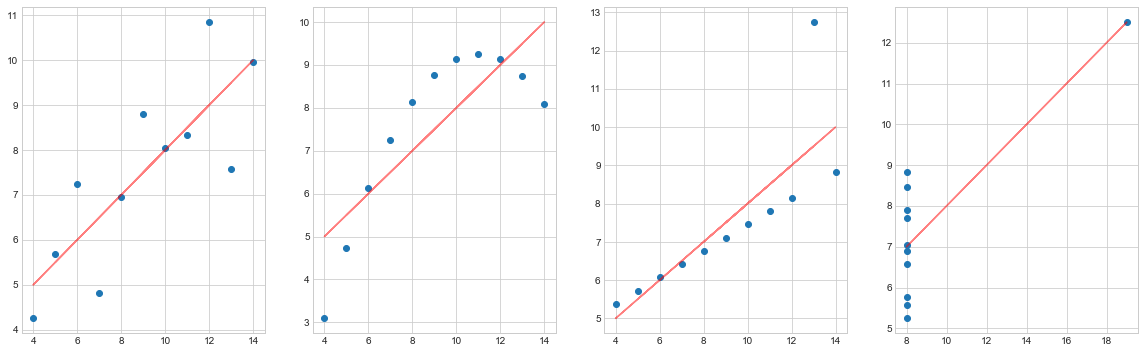

In [49]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(20, 6)

ax1.scatter(x1, y1)
ax1.plot(x1, b0 + b1 * x1, color='red', alpha=0.5)

ax2.scatter(x2, y2)
ax2.plot(x2, b0 + b1 * x2, color='red', alpha=0.5)

ax3.scatter(x3, y3)
ax3.plot(x3, b0 + b1 * x3, color='red', alpha=0.5)

ax4.scatter(x4, y4)
ax4.plot(x4, b0 + b1 * x4, color='red', alpha=0.5)

plt.show()

Какие выводы мы можем сделать: 
    - важно видеть и понимать как распределены данные (xtest, ypredict)
    - разные данные могут быть описаны одними и теми же зависимостями. Это означает, что линейную регрессию нужно использовать только в том случае, если данные репрезентативно укладываются в линейную зависимость 
    - также мы можем добавить, что для с увеличением кол-ва данных в массиве мы бы однозначно столкнулись с другими линейными зависимостями. 

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?


In [52]:
a = 2509
b = 1465 
a_deal = 77 
b_deal = 60 
conv_a = a_deal/a 
conv_b = b_deal/b

conv_a, conv_b

(0.03068951773614986, 0.040955631399317405)

In [53]:
pvalue=0.05

Будем использовать статистику Фишера, а не нормальное распределение, поскольку объем выборки достаточно высок. 

1 - была совершена покупка

0 - не была совершена покупка. 

In [61]:
massiv_a_ones = np.ones(77, dtype=np.int8, order='c')
massiv_a_ones

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [62]:
massiv_a_zeroes = np.zeros(2432, dtype=np.int8, order='c')
massiv_a_zeroes

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [66]:
fin_a=np.concatenate((massiv_a_zeroes, massiv_a_ones), axis=0)

Перемешаем элементы массива для большего правдоподобия. 

In [68]:
np.random.shuffle(fin_a)
fin_a

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

Тоже самое проделаем с элементами массива b. 

In [69]:
massiv_b_ones = np.ones(60, dtype=np.int8, order='c')
massiv_b_zeroes = np.zeros(1405, dtype=np.int8, order='c')
fin_b=np.concatenate((massiv_b_zeroes, massiv_b_ones), axis=0)
np.random.shuffle(fin_b)
fin_b

array([0, 0, 1, ..., 0, 0, 0], dtype=int8)

In [71]:
a_mean=fin_a.mean()
b_mean=fin_b.mean()

a_mean, b_mean

(0.03068951773614986, 0.040955631399317405)

Как мы видим, конверсии и есть среднее значение страниц a, b

In [73]:
fin = np.concatenate((fin_a, fin_b), axis=0)
fin

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [75]:
fin_mean=fin.mean()
fin_mean

0.03447408152994464

In [77]:
n=fin.shape[0]
n

3974

In [78]:
SS_b = a*(a_mean - fin_mean)**2 + b*(b_mean - fin_mean)**2 
SS_b

0.09748158004016791

In [79]:
SS_w = ((fin_a - a_mean)**2).sum() + ((fin_b - b_mean)**2).sum() 
SS_w

132.17956925035742

In [80]:
k=2 
k1=k-1
k2=n-k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(0.09748158004016791, 0.033277837172798946)

In [81]:
F = sigma2_b / sigma2_w
F

2.92932438890135

In [83]:
from scipy import stats
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8438010503414866

Итак, критическая область:
$$\Omega_\alpha = \left( 3.84, \infty \right)$$

Считаем значение статистики:

Значение статистики не попало в критическую область, следовательно результаты являются статистически незначимыми. 

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [212]:
from itertools import combinations
from pprint import pprint

X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

Y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

In [222]:
X=np.array(X)
Y=np.array(Y)
column_x = np.array(X)
column_x[:, 1, None]

array([[2.30868478],
       [1.30337355],
       [1.82463398],
       [2.67392052],
       [1.97367255],
       [0.77750764],
       [1.81206697],
       [2.26971361],
       [3.17563985],
       [2.87988651]])

In [223]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [224]:
ones = np.ones((10,1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [225]:
cloumn = [i for i in range(np.array(X).shape[1])]
column

[0, 1, 2, 3]

In [226]:
fin_res = []
for i in combinations(column, 2):
    res = {}
    x_hub = np.hstack((ones, column_x[:, i[0], None], column_x[:, i[1], None]))
    XTX = x_hub.T.dot(x_hub)
    XTX_inv = np.linalg.inv(XTX)

    b = XTX_inv.dot(x_hub.T).dot(Y)
    z = x_hub.dot(b)
    e = Y - z

    R = 1 - sum_of_squares(e) / sum_of_squares(np.array(Y))
    res = {'column_1': i[0], 'column_2': i[1], 'R': R}
    fin_res.append(res)

pprint(fin_res)

[{'R': 0.18113594742585204, 'column_1': 0, 'column_2': 1},
 {'R': 0.7634246238793152, 'column_1': 0, 'column_2': 2},
 {'R': 0.45329667831440745, 'column_1': 0, 'column_2': 3},
 {'R': 0.547948273403901, 'column_1': 1, 'column_2': 2},
 {'R': 0.6062055761129932, 'column_1': 1, 'column_2': 3},
 {'R': 0.6224419876505323, 'column_1': 2, 'column_2': 3}]


Наилучшее сочетание - это сочетание второго и третьего столбца. Проверим на значимость нашу статистику. Возьмем F-тест Фишера. 

In [232]:
R1 = 0.7634246238793152
n=10   #число наблюдений
m=2    #число факторов(признаков)

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [233]:
from scipy import stats

In [234]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Итак, критическая область:
$$\Omega_\alpha = \left( 4.73, \infty \right)$$

Считаем значение статистики:

In [235]:
F = (R1 / k1) / ((1 - R1) / k2)
F

11.29443912292265

Статистика попала в критическую область, уравнение регрессии признаётся значимым.